<a href="https://colab.research.google.com/github/seydanur-hemithea/COMPUTER_V-S-ON-/blob/main/object_detection_retinanet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision
!pip install matplotlib opencv-python

In [2]:
!pip install roboflow
from roboflow import Roboflow

rf = Roboflow(api_key="your_roboflow_api_key")
project = rf.workspace("roboflow-xzkgh").project("drones-birds-planes-v2")
dataset = project.version(1).download("coco")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.8/89.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 71.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 129.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...
Exporting format coco in progress : 85.0%
Version export complete for coco format



Extracting Dataset Version Zip to drones-birds-planes-v2-1 in coco:: 100%|██████████| 23039/23039 [00:06<00:00, 3605.89it/s]


In [3]:
import torchvision
from torchvision.models.detection import retinanet_resnet50_fpn
import torch

model = retinanet_resnet50_fpn(pretrained=True)
model.eval()

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RetinaNet_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.


Downloading: "https://download.pytorch.org/models/retinanet_resnet50_fpn_coco-eeacb38b.pth" to /root/.cache/torch/hub/checkpoints/retinanet_resnet50_fpn_coco-eeacb38b.pth


100%|██████████| 130M/130M [00:00<00:00, 187MB/s]


RetinaNet(
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d(256, eps=0.0)


In [4]:
from google.colab import files
uploaded = files.upload()

Saving picture-should-contain-one-airplane-260nw-2665223549.jpg to picture-should-contain-one-airplane-260nw-2665223549.jpg


In [5]:
from PIL import Image
import torchvision.transforms as T

image = Image.open("picture-should-contain-one-airplane-260nw-2665223549.jpg").convert("RGB")
transform = T.Compose([T.ToTensor()])
img_tensor = transform(image).unsqueeze(0)

In [6]:
with torch.no_grad():
    predictions = model(img_tensor)[0]

for box, label, score in zip(predictions['boxes'], predictions['labels'], predictions['scores']):
    if score > 0.5:
        print(f"Nesne: {label}, Güven: {score:.2f}, Konum: {box}")

Nesne: 5, Güven: 0.98, Konum: tensor([149.1967,  57.8055, 227.2527,  86.9944])
Nesne: 5, Güven: 0.97, Konum: tensor([  5.5075, 137.1710, 149.4577, 177.9677])


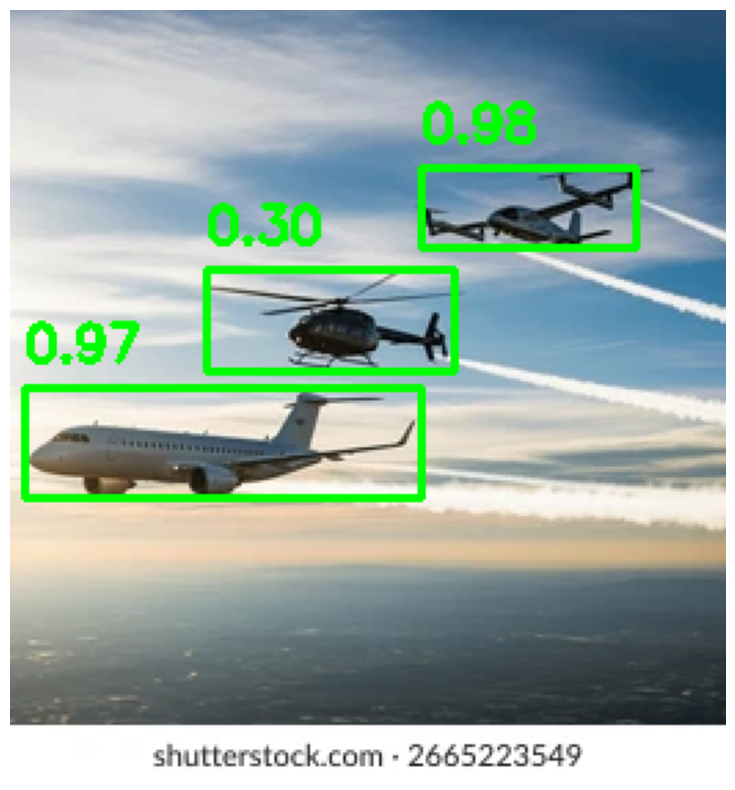

In [13]:
import cv2
import matplotlib.pyplot as plt

img_cv = cv2.imread("picture-should-contain-one-airplane-260nw-2665223549.jpg")  # kendi görselinle değiştir

for box, score in zip(predictions['boxes'], predictions['scores']):
    if score > 0.2:
        x1, y1, x2, y2 = box.tolist()
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)

        # Kutu çiz
        cv2.rectangle(img_cv, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Güven skoru yaz
        label = f"{score:.2f}"
        cv2.putText(img_cv, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Görselleştir
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()